In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/sample_submission.csv')
test = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/test.csv')
train = pd.read_csv('/Users/jjong/desktop/vscode/kaggle_src/house-prices/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
combine = pd.concat([train, test], axis=0)
combine

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
combine.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [13]:
df1 = combine.iloc[:1460]
df2 = combine.iloc[1460:].drop('SalePrice', axis=1)

In [14]:
df1 = df1.dropna()
y = df1['SalePrice']
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [15]:
df2 = df2.dropna()
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [16]:
obj = df1.select_dtypes('object')
inte = df1[df1.columns[df1.dtypes != 'object']]

obj2 = df2.select_dtypes('object')
inte2 = df2[df2.columns[df2.dtypes != 'object']]

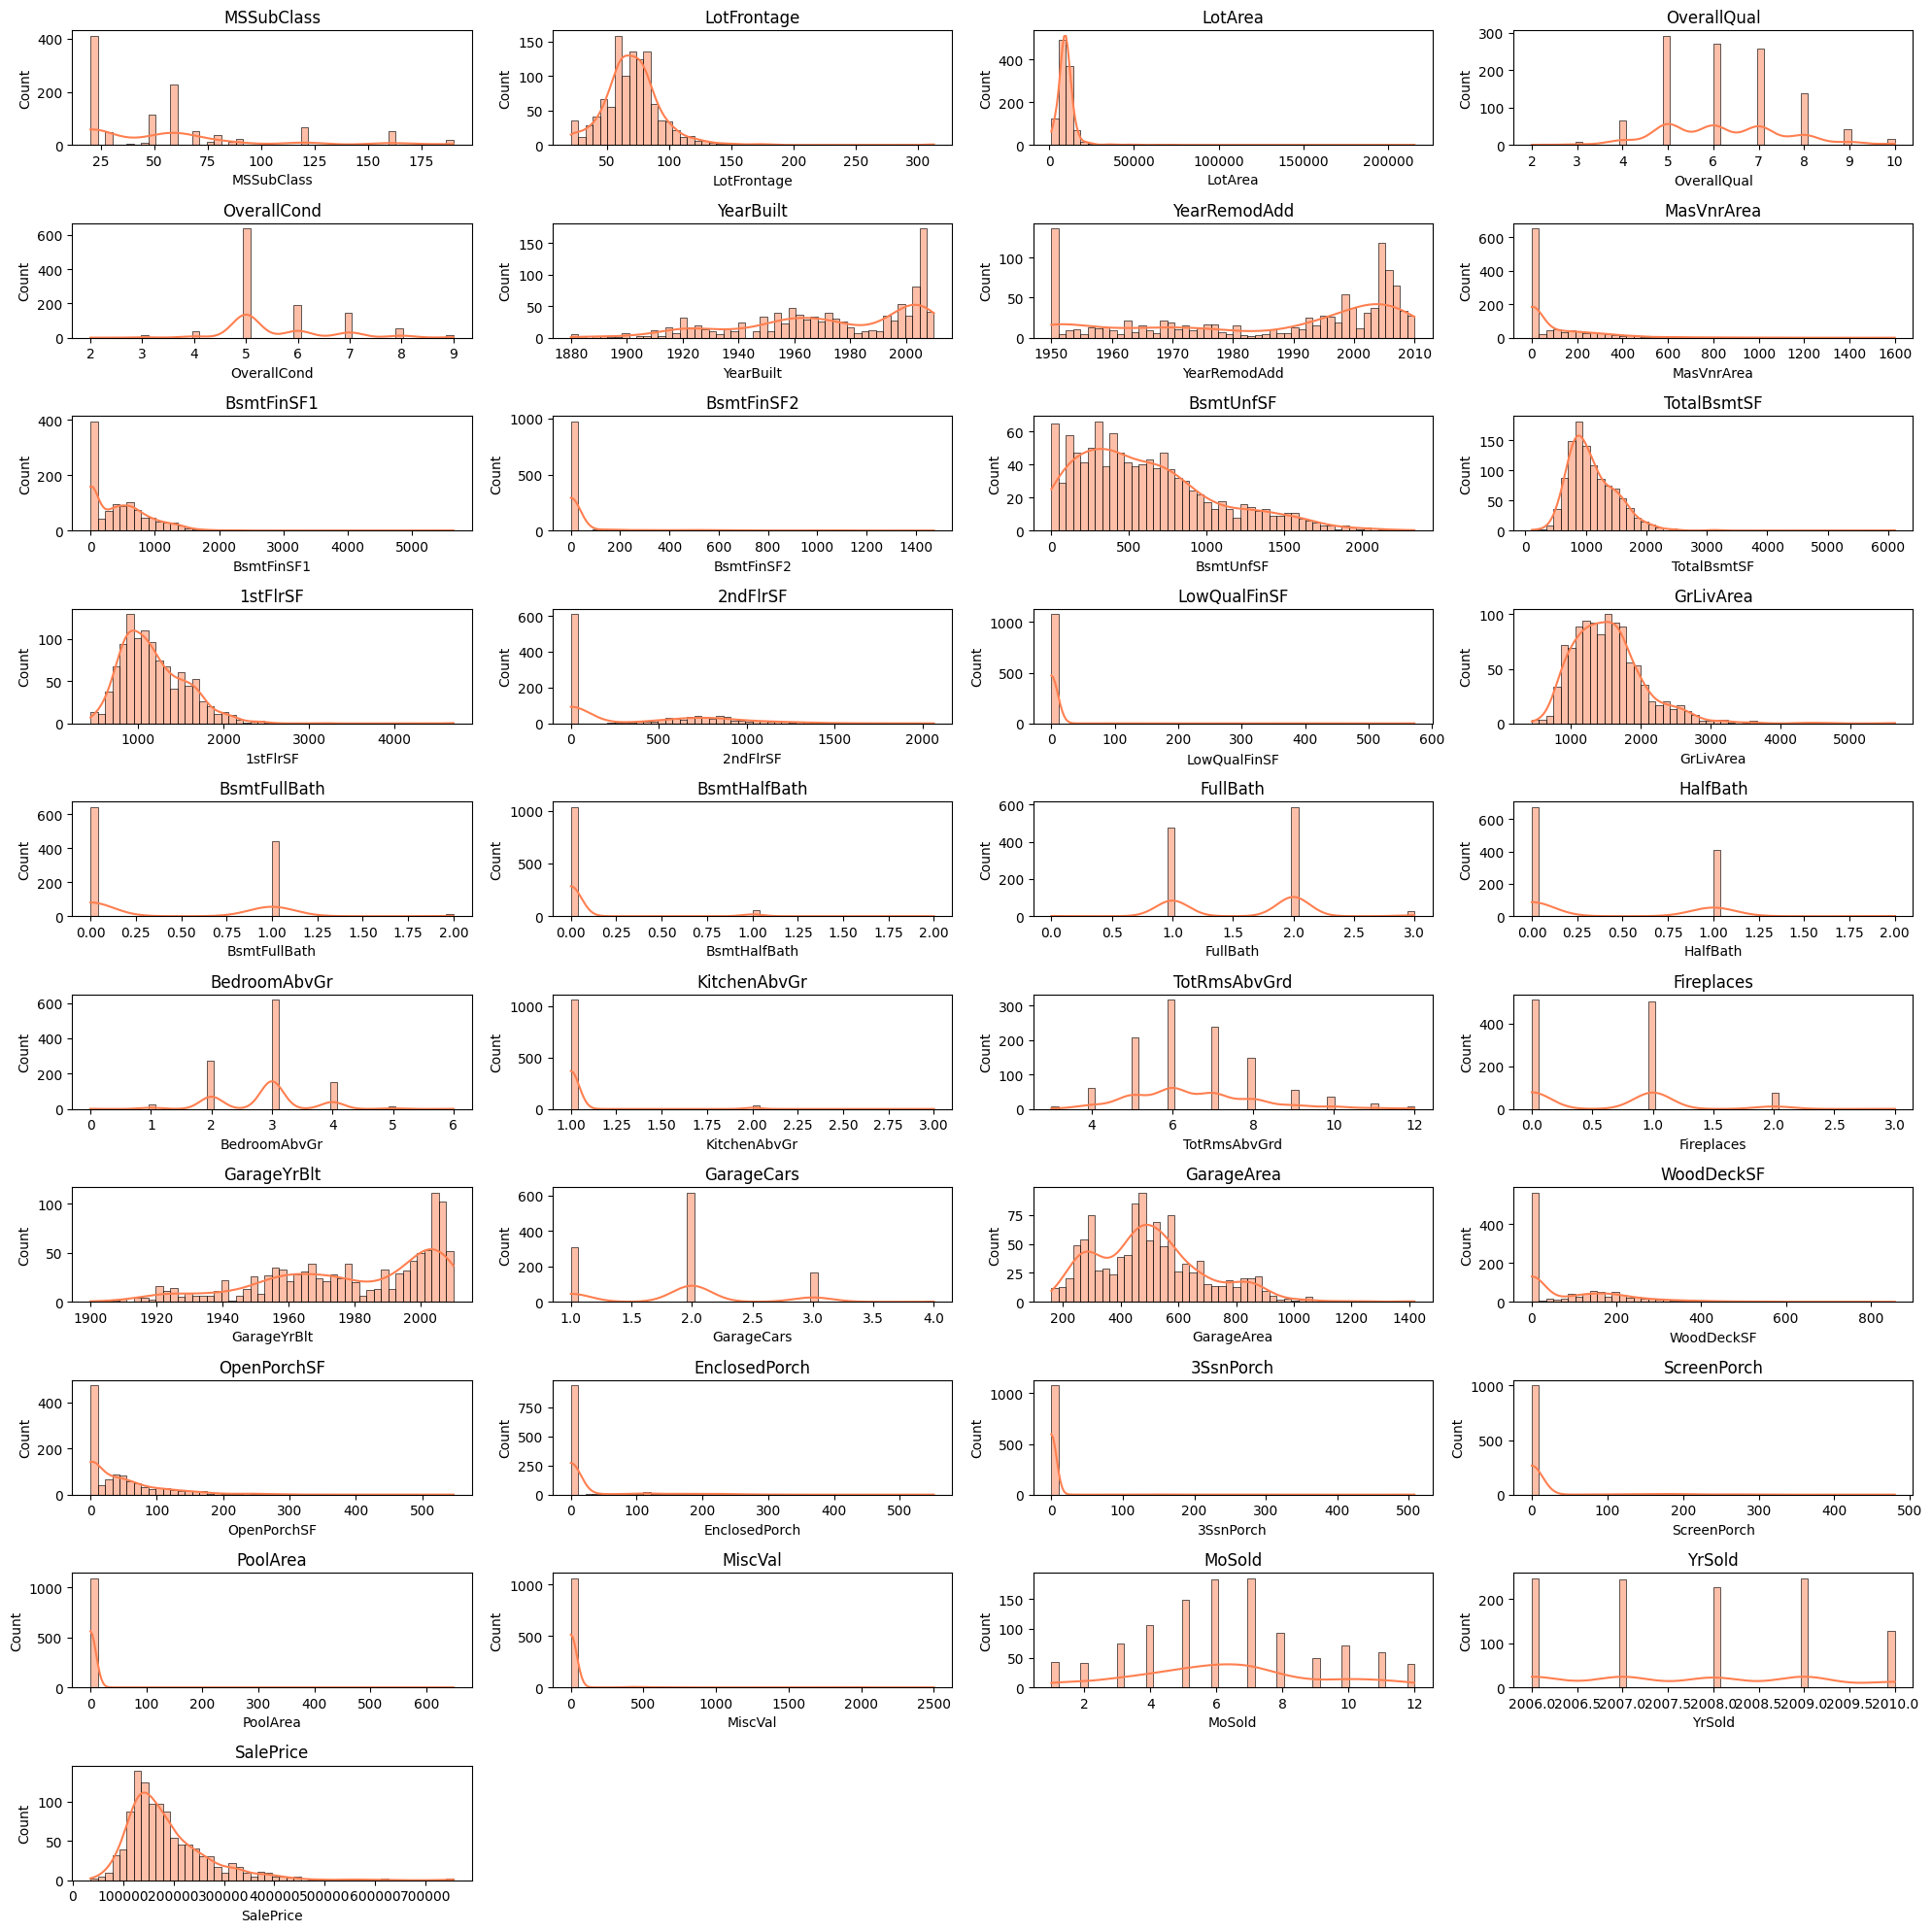

In [12]:
plt.figure(figsize=(20, 20))
for i in range(len(inte.columns[1:])):
    plt.subplot(10, 4, i+1)
    sns.histplot(inte[inte.columns[i+1]], kde=True, bins=50, color='coral')
    plt.title(inte.columns[i+1])
plt.tight_layout()
plt.show()

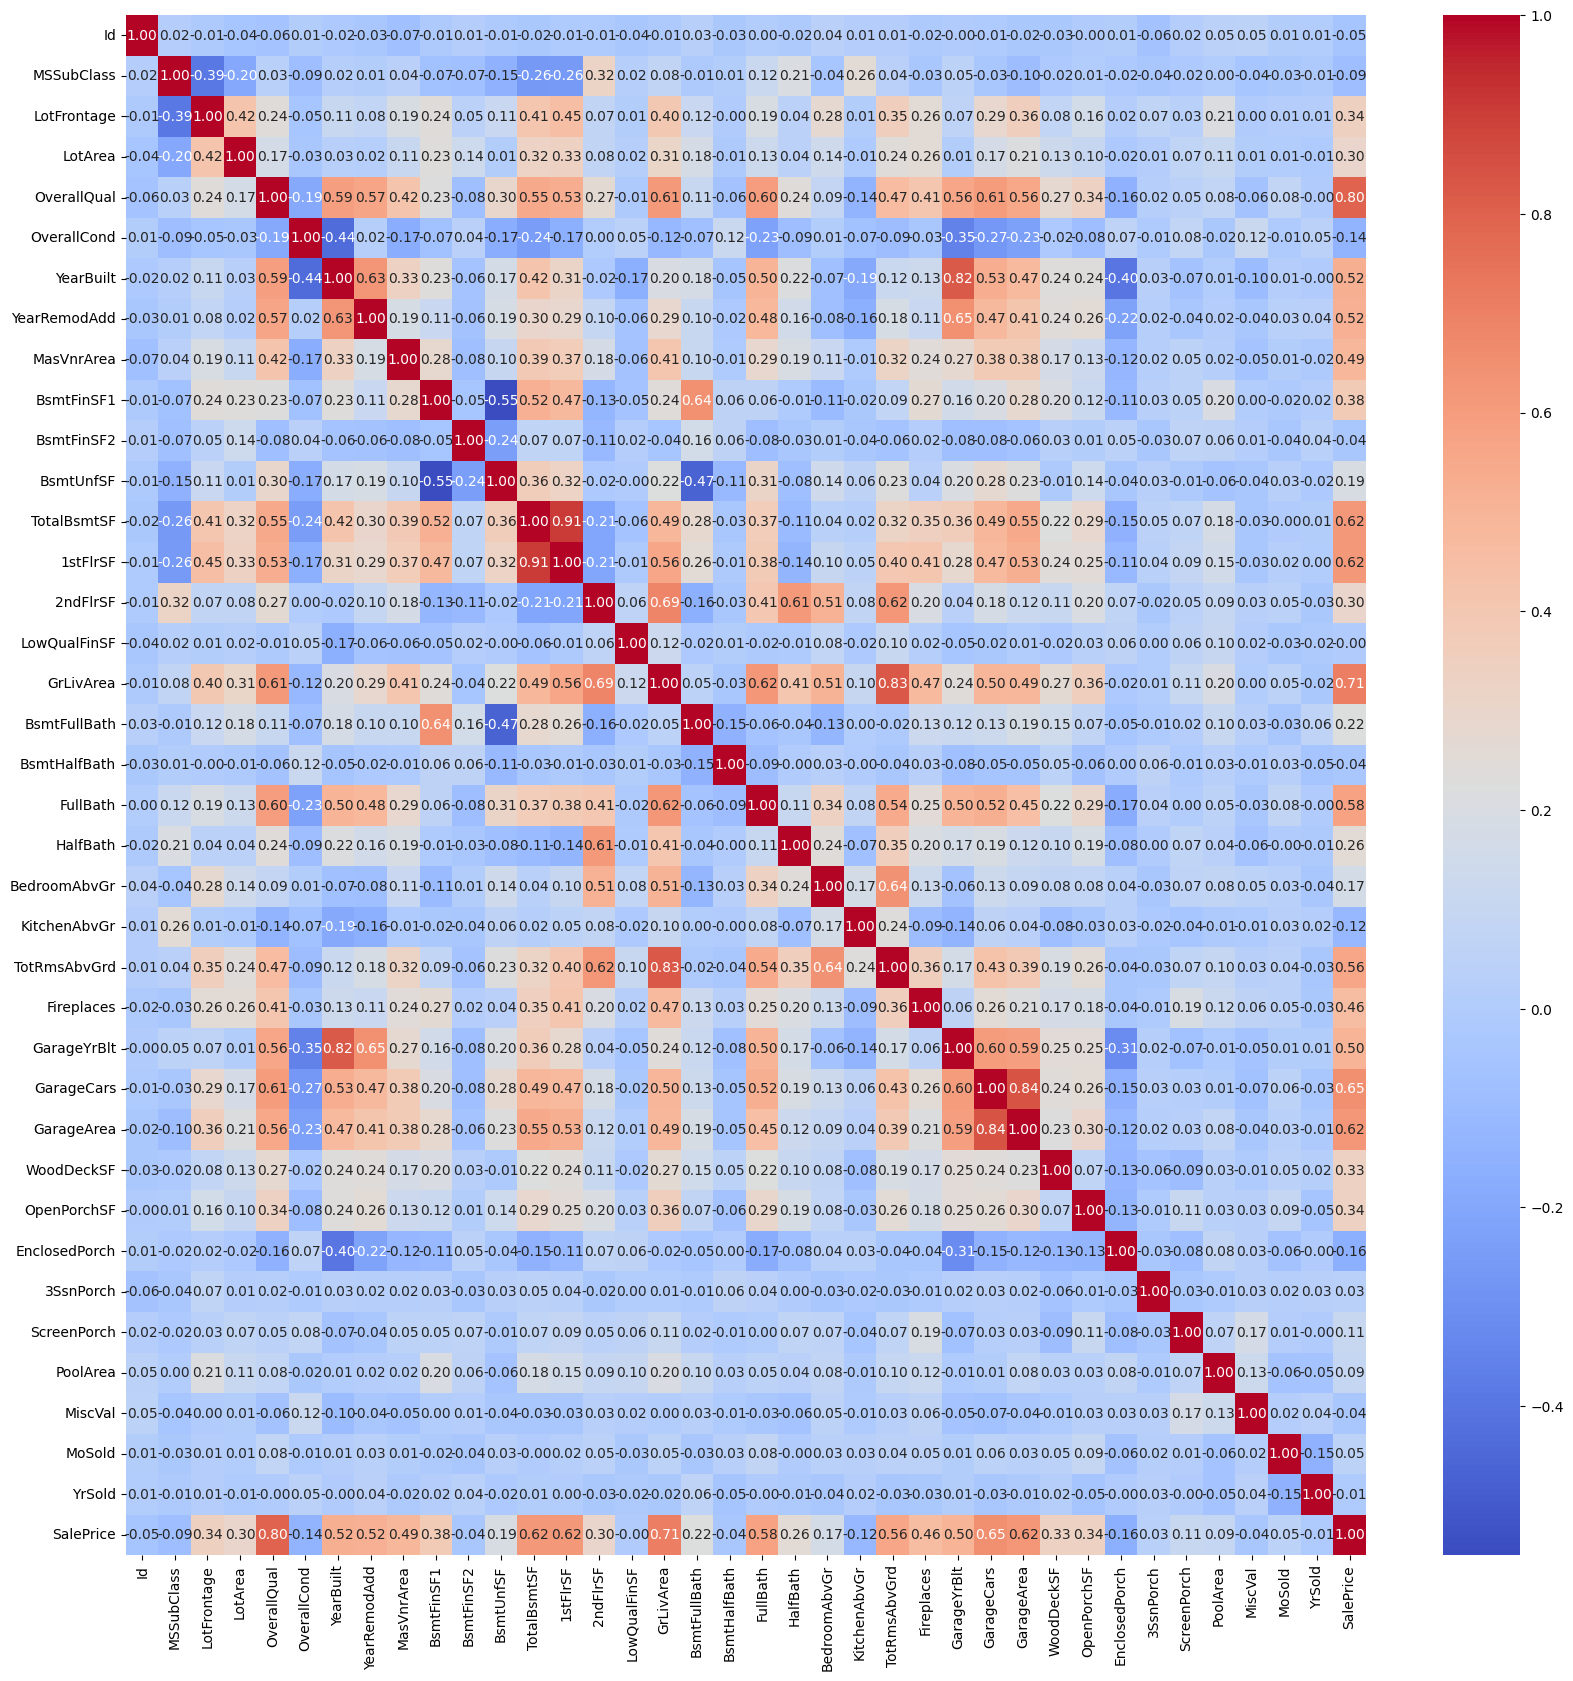

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [9]:
tmp = inte.corr()
tmp['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795437
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
EnclosedPorch    0.161711
OverallCond      0.138511
KitchenAbvGr     0.115382
ScreenPorch      0.106479
PoolArea         0.092085
MSSubClass       0.089478
MoSold           0.052584
Id               0.047595
BsmtHalfBath     0.041341
BsmtFinSF2       0.036923
MiscVal          0.036001
3SsnPorch        0.033947
YrSold           0.006723
LowQualFinSF     0.003541
Name: SalePr

C:\Users\jjong\AppData\Local\Temp\ipykernel_5864\152043303.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='OverallQual', y='SalePrice', data=inte, jitter=True, dodge=True, palette='Set3', ax=ax[0])


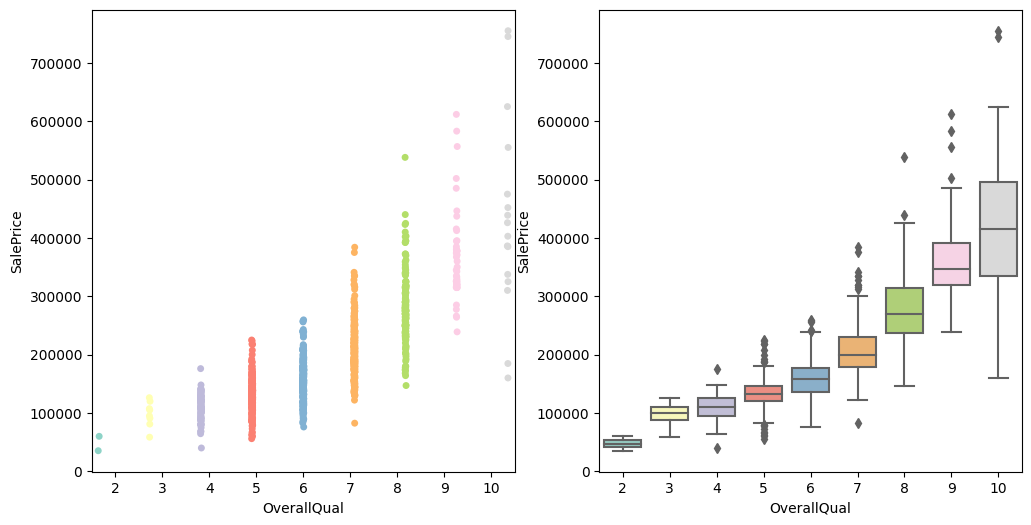

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(x='OverallQual', y='SalePrice', data=inte, jitter=True, dodge=True, palette='Set3', ax=ax[0])
sns.boxplot(x='OverallQual', y='SalePrice', data=inte, palette='Set3', ax=ax[1])
plt.show()

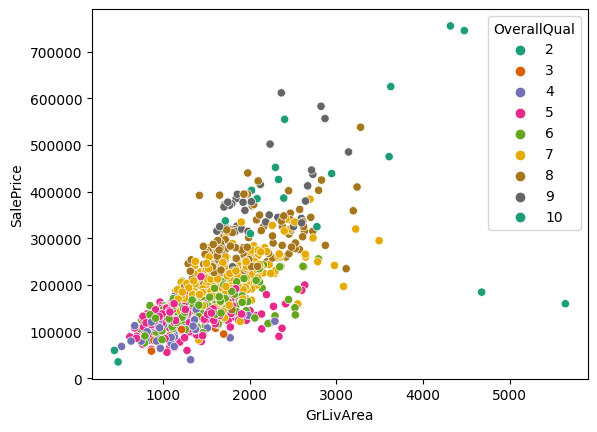

In [15]:
plt.figure()
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df1, hue='OverallQual', palette='Dark2')
plt.show()

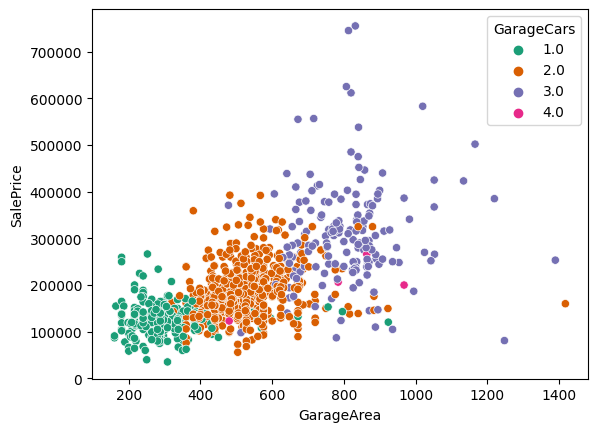

In [16]:
plt.figure()
sns.scatterplot(x='GarageArea', y='SalePrice', data=df1, hue='GarageCars', palette='Dark2')
plt.show()

C:\Users\jjong\AppData\Local\Temp\ipykernel_5864\70954613.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df1,ax=ax[0], palette='tab20c_r')


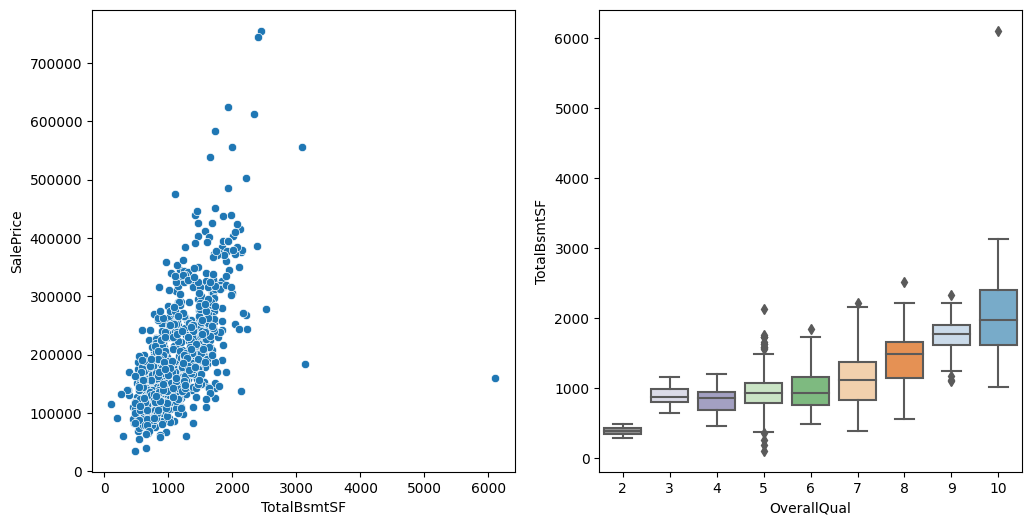

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df1,ax=ax[0], palette='tab20c_r')
sns.boxplot(x='OverallQual', y='TotalBsmtSF', data=df1,ax=ax[1], palette='tab20c_r')
plt.show()

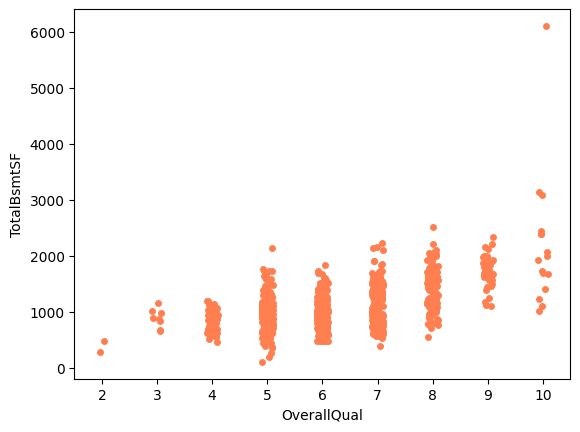

In [18]:
plt.figure()
sns.stripplot(x='OverallQual', y='TotalBsmtSF', data=df1, color='coral')
plt.show()

In [19]:
obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in obj.columns:
    obj[column] = le.fit_transform(obj[column])
obj_y = pd.concat([obj, y], axis=1)
obj_y

# 테스트 데이터 변환
for column in obj2.columns:
    known_labels = set(le.classes_)
    obj2[column] = obj2[column].apply(lambda x: x if x in known_labels else -1)
    le.classes_ = np.append(le.classes_, -1) # UNKNOWN_LABEL 추가
    obj2[column] = le.transform(obj2[column])
obj2

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
1,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
2,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
3,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
4,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,4
1452,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,0
1455,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,0
1456,6,7,8,9,10,11,12,13,14,15,...,33,34,35,36,37,38,39,40,41,0


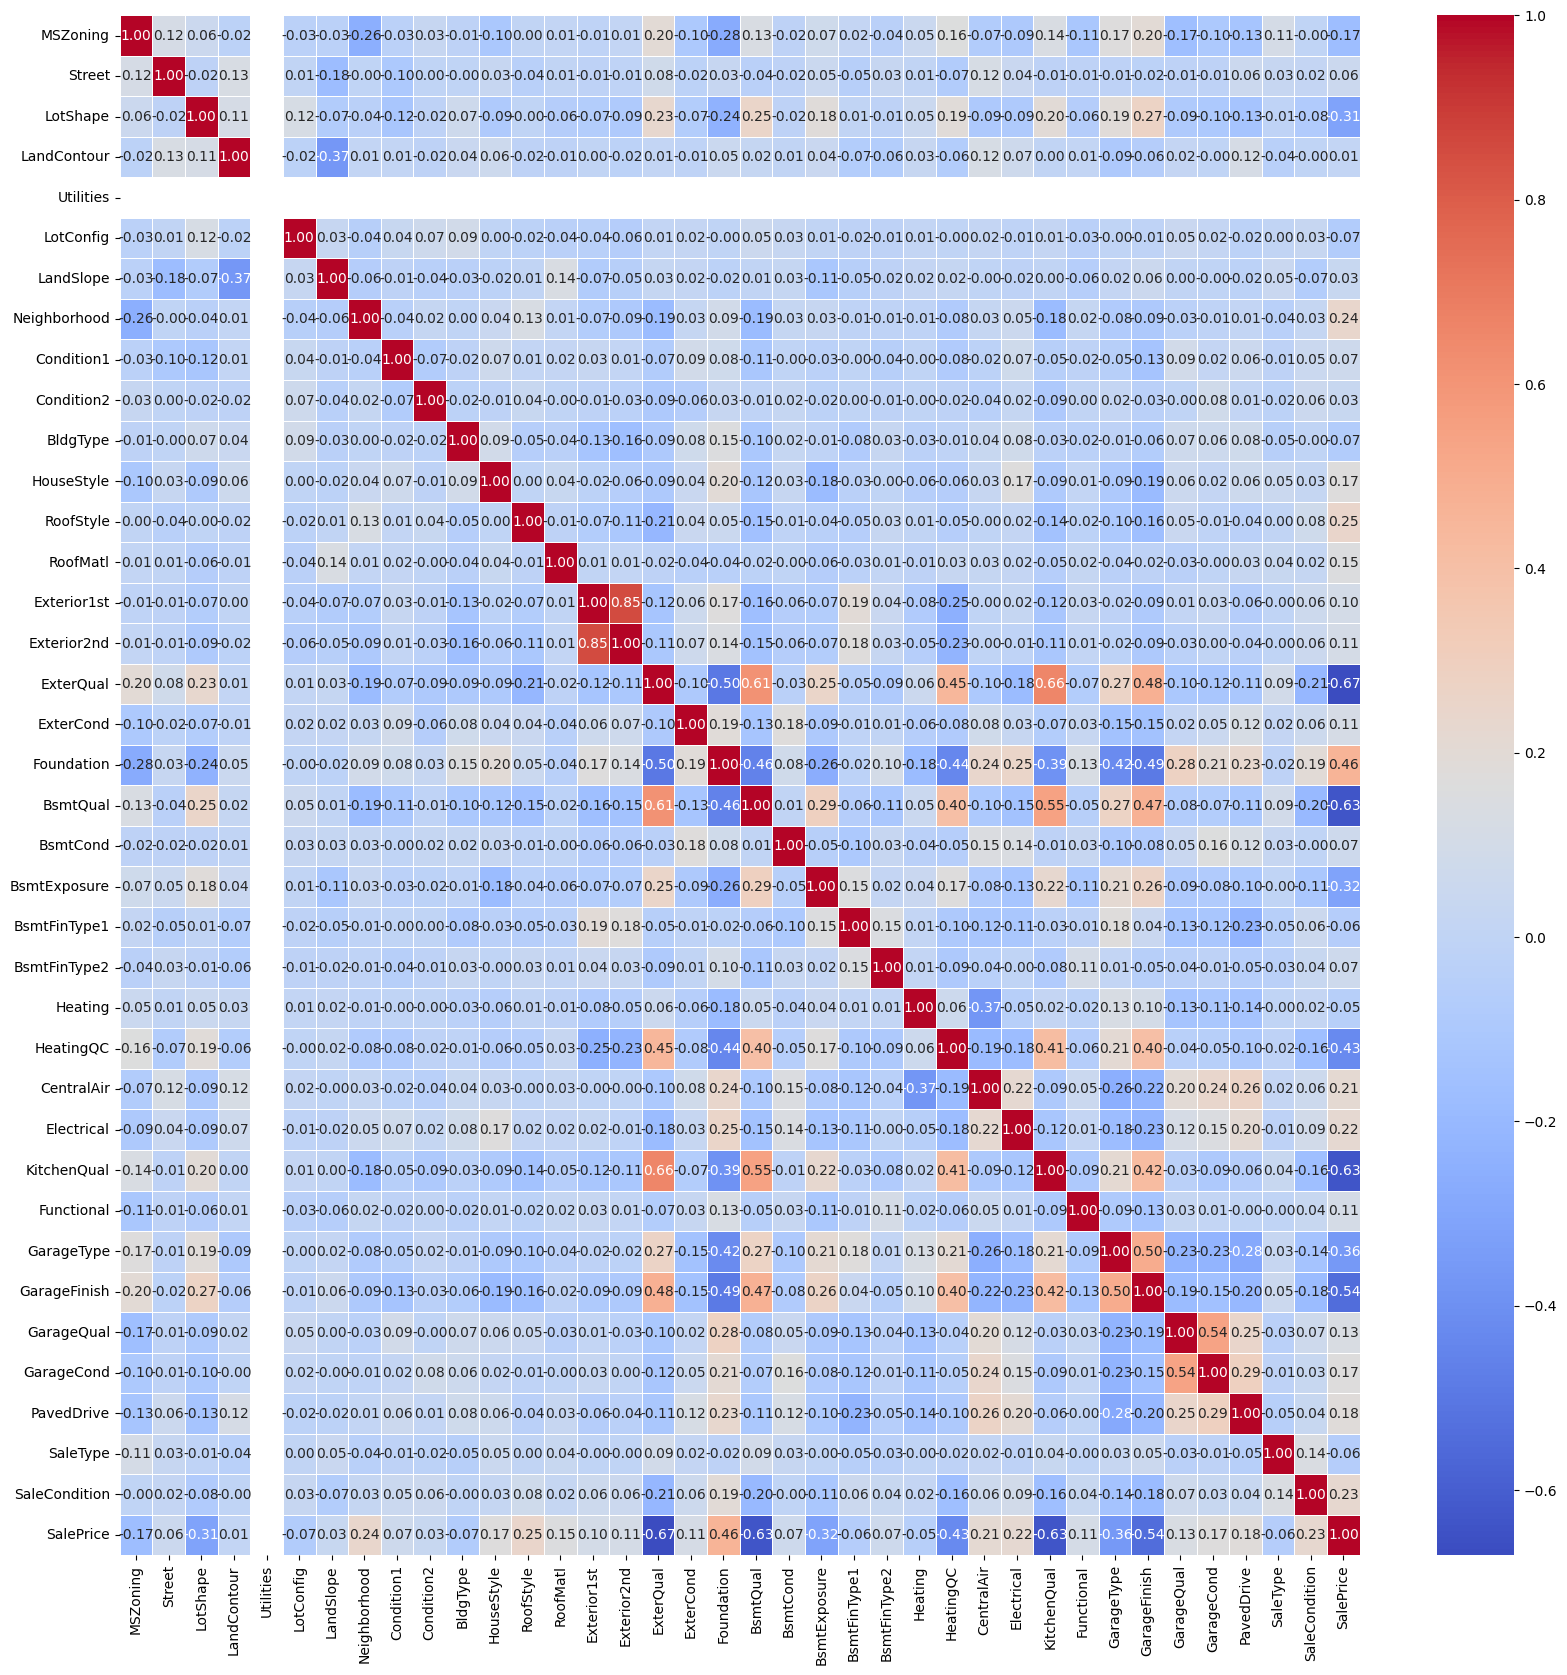

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(obj_y.corr(),annot=True, fmt='.2f', cmap='coolwarm',linewidths=0.5)
plt.show()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,5.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,208500.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,3.0,5.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,181500.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,5.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,223500.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,5.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0,140000.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,2.0,5.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92900.0
1216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112000.0
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101800.0
1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167500.0


In [52]:
obj_y = obj_y.dropna()
tmp = obj_y.corr()
tmp['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
ExterQual        0.670709
KitchenQual      0.634515
BsmtQual         0.634377
GarageFinish     0.541200
Foundation       0.459949
HeatingQC        0.426023
GarageType       0.360984
BsmtExposure     0.316970
LotShape         0.313883
RoofStyle        0.248867
Neighborhood     0.242889
SaleCondition    0.226824
Electrical       0.220920
CentralAir       0.212446
PavedDrive       0.183778
HouseStyle       0.168509
MSZoning         0.168449
GarageCond       0.167126
RoofMatl         0.154824
GarageQual       0.134103
ExterCond        0.112624
Exterior2nd      0.112239
Functional       0.112115
Exterior1st      0.102207
Condition1       0.073191
LotConfig        0.072047
BldgType         0.071620
BsmtCond         0.071115
BsmtFinType2     0.069132
BsmtFinType1     0.061764
SaleType         0.061219
Street           0.057286
Heating          0.048339
Condition2       0.034674
LandSlope        0.034346
LandContour      0.008829
Utilities             NaN
Name: SalePr

C:\Users\jjong\AppData\Local\Temp\ipykernel_5864\1841424979.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='ExterQual', y='SalePrice', data=obj_y, jitter=True, dodge=True, palette='Set2', ax=ax[0])


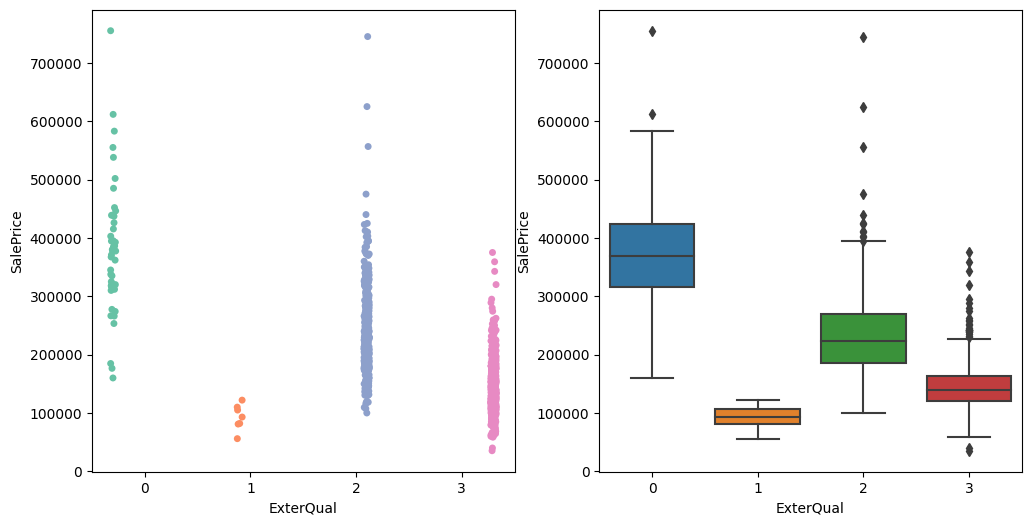

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(x='ExterQual', y='SalePrice', data=obj_y, jitter=True, dodge=True, palette='Set2', ax=ax[0])
sns.boxplot(x='ExterQual', y='SalePrice', data=obj_y, ax=ax[1])
plt.show()

In [17]:
data = pd.concat([inte, obj], axis=1)
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

inte = inte.drop('SalePrice', axis=1)

mmscaler = MinMaxScaler()
stdscaler = StandardScaler()
inte_sc = stdscaler.fit_transform(inte)
inte2_sc = stdscaler.transform(inte2)
obj_sc = mmscaler.fit_transform(obj)
obj2_sc = mmscaler.transform(obj2)

# numpy 배열을 DataFrame으로 변환
inte_sc_df = pd.DataFrame(inte_sc, columns=inte.columns)
inte2_sc_df = pd.DataFrame(inte2_sc, columns=inte.columns)
obj_sc_df = pd.DataFrame(obj_sc, columns=obj.columns)
obj2_sc_df = pd.DataFrame(obj2_sc, columns=obj.columns)

train_df = pd.concat([inte_sc_df, obj_sc_df], axis=1)
test_df = pd.concat([inte2_sc_df, obj2_sc_df], axis=1)

In [27]:
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.726330,0.092264,-0.235108,-0.204952,0.550652,-0.540208,0.981147,0.816592,0.452011,0.550268,...,1.0,0.666667,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1,-1.723953,-0.861090,0.377195,-0.064853,-0.181320,2.274018,0.115082,-0.473964,-0.576427,1.130827,...,1.0,1.000000,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
2,-1.721576,0.092264,-0.112647,0.136158,0.550652,-0.540208,0.916994,0.768794,0.273609,0.080698,...,1.0,0.666667,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
3,-1.719200,0.330602,-0.439209,-0.070944,0.550652,-0.540208,-1.841583,-0.760755,-0.576427,-0.495593,...,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,-1.716823,0.092264,0.540476,0.502851,1.282624,-0.540208,0.884918,0.673197,1.260070,0.441413,...,1.0,0.666667,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1.731674,0.092264,-0.357569,-0.269885,-0.181320,-0.540208,0.852841,0.673197,-0.576427,-0.956625,...,1.0,1.000000,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1090,1.734050,-0.861090,0.581297,0.370671,-0.181320,0.397867,0.179235,0.099616,0.047982,0.729558,...,1.0,1.000000,0.4,0.2,1.0,1.0,1.0,1.0,1.0,0.8
1091,1.736427,0.330602,-0.194288,-0.132831,0.550652,3.212093,-1.007594,0.959988,-0.576427,-0.369662,...,1.0,0.666667,1.0,0.2,0.5,1.0,1.0,1.0,1.0,0.8
1092,1.738804,-0.861090,-0.112647,-0.050600,-0.913293,0.397867,-0.718906,0.482004,-0.576427,-0.852039,...,0.0,0.666667,1.0,0.2,1.0,1.0,1.0,1.0,1.0,0.8


---

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def varification(y, p):
    print('MAE : ', mean_absolute_error(y, p))
    print('MSE : ', mean_squared_error(y, p))
    print('MAPE: ', mean_absolute_percentage_error(y, p))

In [8]:
# selected_data = combine[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
#                          'YearBuilt', 'YearRemodAdd', 'SalePrice', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish']]

In [9]:
combine_dum = pd.get_dummies(combine)
# combine_dum = pd.get_dummies(selected_data)
train_dum = combine_dum.iloc[:1460]
test_dum = combine_dum.iloc[1460:].drop(['SalePrice'], axis=1)

train_dum = train_dum.dropna()
# test_dum = test_dum.dropna

y = train_dum['SalePrice']
train_dum = train_dum.drop('SalePrice', axis=1)

In [10]:
train_dum.shape, test_dum.shape, y.shape 

((1121, 267), (1459, 267), (1121,))

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_dum, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_test_sc = std.transform(X_test)
real_test_sc = std.transform(test_dum)
# submit_sc = std.transform(test)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

start = time.time()

# Random Forest 모델 생성
rf = RandomForestRegressor()

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6, 7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# GridSearchCV를 이용한 모델 훈련
grid_search.fit(X_train_sc, y_train)

# 최적의 파라미터와 그 때의 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 점수:", grid_search.best_score_)

edn = time.time()
print(f"time : {edn - start}")

최적의 파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
최고 점수: 0.8386413533431017
time : 284.76714873313904


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=1, min_samples_split=2)

rf.fit(X_train_sc, y_train)
p_test_rf = rf.predict(X_test_sc)
varification(y_test, p_test_rf)

MAE :  19861.027699628605
MSE :  1063766461.5961602
MAPE:  0.09933137709106736


In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=1, min_samples_split=2)

rf.fit(X_train_pca, y_train)
p_test_pca_rf = rf.predict(X_test_pca)
varification(y_test, p_test_pca_rf)

MAE :  30512.17516342193
MSE :  2013551898.804942
MAPE:  0.15665631173123692


In [12]:
# 필요한 라이브러리 임포트
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

# XGBoost 회귀 모델 생성
xgb_reg = XGBRegressor()

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [5, 6, 7, 8, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1)

# GridSearchCV를 이용한 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그 때의 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 점수:", grid_search.best_score_)

end = time.time()
print("time :", end - start)

최적의 파라미터: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}
최고 점수: 0.863455501581134
time : 3923.6925888061523


In [17]:
xgb = XGBRegressor(n_estimators=500, colsample_bytree=0.6, learning_rate=0.1, subsample=0.7, max_depth=5, gamma=0)
xgb.fit(X_train_sc, y_train)
p_test_xgb = xgb.predict(X_test_sc)
varification(y_test, p_test_xgb)

MAE :  18008.872291666667
MSE :  1011696203.9079394
MAPE:  0.09009731609538062


In [16]:
xgb = XGBRegressor(n_estimators=500, colsample_bytree=0.6, learning_rate=0.1, subsample=0.7, max_depth=5, gamma=0)
xgb.fit(X_train_pca, y_train)
p_test_xgb = xgb.predict(X_test_pca)
varification(y_test, p_test_xgb)

MAE :  32824.15652777778
MSE :  2387734702.321119
MAPE:  0.16937612358791318


In [189]:
submit = test['Id']
submit

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [190]:
p_real = xgb.predict(real_test_sc)

In [192]:
p_real_df = pd.DataFrame(p_real, columns=['SalePrice'])
final = pd.concat([submit, p_real_df], axis=1)
final.to_csv('submission.csv', index=False)

In [147]:
submit.reset_index(drop=True, inplace=True)
p_real_df.reset_index(drop=True, inplace=True)
final = pd.concat([submit, p_real_df], axis=1)
final.shape

(1146, 2)

In [151]:
final.to_csv('submission.csv', index=False)

In [159]:
test_drop = test.dropna(axis=1)
test_drop

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,Normal
